<a href="https://colab.research.google.com/github/jylee2930/DataMining/blob/main/4_1_mnist_cnn_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[구글 코랩(Colab)에서 실행하기](https://colab.research.google.com/github/lovedlim/tensorflow/blob/main/Part%204/4.1_mnist_cnn.ipynb)

## import

In [ ]:
# tensorflow 모듈 import
import tensorflow as tf

## Dataset

In [ ]:
# MNIST 손글씨 이미지 데이터 로드
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


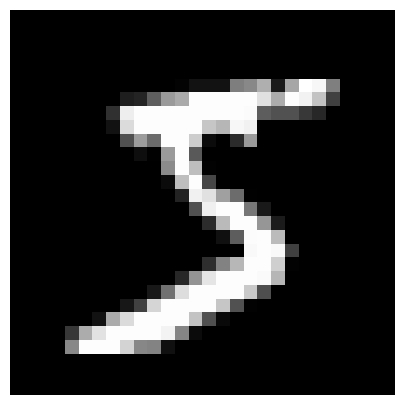

In [ ]:
# 샘플 이미지 출력
import matplotlib.pylab as plt

def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [ ]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [ ]:
# 정규화(Normalization)
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [ ]:
# 채널 추가
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


## Simple CNN

In [ ]:
# Sequential API를 사용하여 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용 (size 3X3, 32 filters)
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',
                           input_shape=(28, 28, 1), name='conv'),
    # 2X2 Max Pooling 적용
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train_in, y_train,
                    validation_data=(x_valid_in, y_valid),
                    epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8886 - loss: 0.4006 - val_accuracy: 0.9740 - val_loss: 0.0860
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9769 - loss: 0.0794 - val_accuracy: 0.9809 - val_loss: 0.0619
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9796 - val_loss: 0.0646
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9857 - loss: 0.0459 - val_accuracy: 0.9810 - val_loss: 0.0601
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9883 - loss: 0.0379 - val_accuracy: 0.9814 - val_loss: 0.0538
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9834 - val_loss: 0.0542
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0299 - val_accuracy: 0.9838 - val_loss: 0.0544
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0245 -

In [ ]:
model.evaluate(x_valid_in, y_valid)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9813 - loss: 0.0740


[0.06068841367959976, 0.9843000173568726]

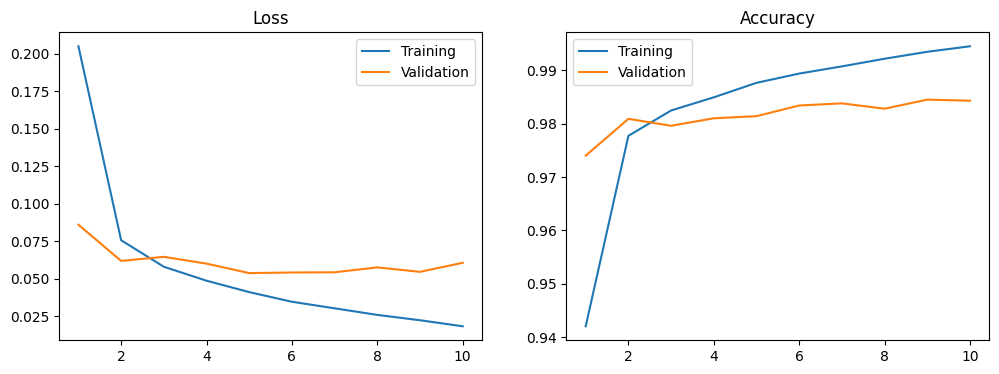

In [ ]:
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 10)

## CNN 레이어 중간 출력값을 시각화

In [ ]:
# 모델 구조
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                   │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool (MaxPooling2D)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [ ]:
# 입력 텐서 형태
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [ ]:
# 출력 텐서 형태, 0~9 까지 10개 classes
model.layers[-1].output

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_4>

In [ ]:
# 레이어
model.layers

[<Conv2D name=conv, built=True>,
 <MaxPooling2D name=pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>]

In [ ]:
# 첫번째 레이어 선택
model.layers[0]

<Conv2D name=conv, built=True>

In [ ]:
# 첫번째 레이어 입력, 28X28 흑백 이미지
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, ragged=False, name=keras_tensor>

In [ ]:
# 첫번째 레이어 출력
model.layers[0].output

<KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>

In [ ]:
# 첫번째 레이어 가중치,
model.layers[0].weights

[<Variable path=sequential/conv/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[ 0.5379046  -0.8921361   0.05604247 -0.76647824  0.27798548
      0.30158854  0.05940764  0.42262357 -0.10984144 -1.2238348
      0.00221636  0.17611927 -0.2666186  -1.3889995  -0.29303524
     -0.6499482   0.29310384 -0.16926849 -0.02584849 -0.03476987
      0.3853065   0.27592015  0.64248955 -0.71067375  0.27414304
     -0.30371058  0.07128935  0.31496644 -0.54594576 -0.02217057
      0.4113135  -0.02575142]]
 
   [[-0.3023884  -0.7097037   0.25913066  0.22628178  0.29441717
      0.03445108  0.24234688  0.69589806 -0.14098257 -1.1473682
     -0.51461536  0.23720081 -0.81068075 -0.9795971   0.35059223
      0.07415472 -0.2503008   0.15540002  0.29834375 -0.05078482
      0.10516979  0.28196904  0.19730881  0.2386259   0.4548112
     -0.22370239  0.05657563  0.48075312  0.0835967   0.52421063
     -0.24776193  0.5603507 ]]
 
   [[-0.9803976  -0.58396304 -0.372145    0.40458083 -0.52617896
      0.034

In [ ]:
# 첫번째 레이어 커널 가중치
model.layers[0].kernel

<Variable path=sequential/conv/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[ 0.5379046  -0.8921361   0.05604247 -0.76647824  0.27798548
     0.30158854  0.05940764  0.42262357 -0.10984144 -1.2238348
     0.00221636  0.17611927 -0.2666186  -1.3889995  -0.29303524
    -0.6499482   0.29310384 -0.16926849 -0.02584849 -0.03476987
     0.3853065   0.27592015  0.64248955 -0.71067375  0.27414304
    -0.30371058  0.07128935  0.31496644 -0.54594576 -0.02217057
     0.4113135  -0.02575142]]

  [[-0.3023884  -0.7097037   0.25913066  0.22628178  0.29441717
     0.03445108  0.24234688  0.69589806 -0.14098257 -1.1473682
    -0.51461536  0.23720081 -0.81068075 -0.9795971   0.35059223
     0.07415472 -0.2503008   0.15540002  0.29834375 -0.05078482
     0.10516979  0.28196904  0.19730881  0.2386259   0.4548112
    -0.22370239  0.05657563  0.48075312  0.0835967   0.52421063
    -0.24776193  0.5603507 ]]

  [[-0.9803976  -0.58396304 -0.372145    0.40458083 -0.52617896
     0.03405492  0.02593122 

In [ ]:
# 첫번째 레이어 bias 가중치
model.layers[0].bias

<Variable path=sequential/conv/bias, shape=(32,), dtype=float32, value=[ 0.17208384  0.01863771 -0.27192828 -0.0837873  -0.20518072 -0.30507904
 -0.1276259   0.0051408  -0.08081158 -0.00759894 -0.04943746 -0.27874103
 -0.17252597 -0.01354482 -0.03045446 -0.0459857  -0.1501598   0.1000488
 -0.09810142 -0.14795084 -0.1552996  -0.17941864 -0.01147685 -0.14613925
 -0.02017308 -0.14652286 -0.05185131 -0.06143082 -0.04902883 -0.01670953
 -0.37021488 -0.02949799]>

In [ ]:
# 레이어 이름 사용하여 레이어 선택
model.get_layer('conv')

<Conv2D name=conv, built=True>

In [ ]:
# 샘플 이미지의 레이어별 출력을 리스트에 추가 (첫번째, 두번째 레이어)
activator = tf.keras.Model(inputs=model.layers[0].input,
                           outputs=[layer.output for layer in model.layers[:2]] )
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


2

In [ ]:
# 첫 번째 레이어(conv) 출력층
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

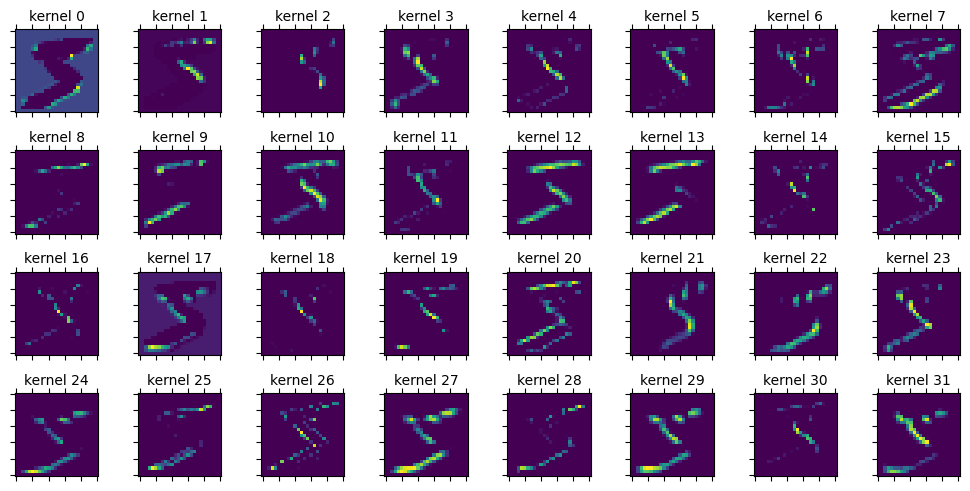

In [ ]:
# Convolution 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [ ]:
# 두 번째 레이어(pool) 출력층
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


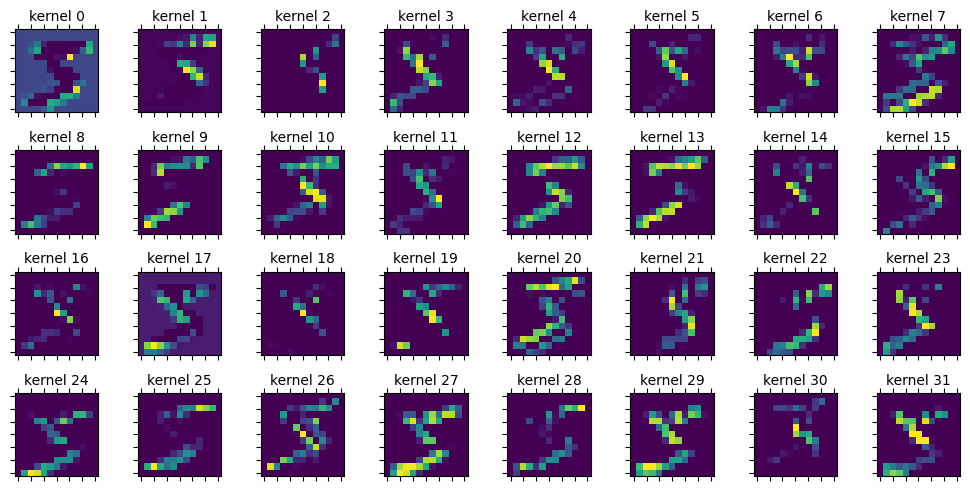

In [ ]:
# 시각화
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp( axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp( axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()